# Sentimental Analysis

In [4]:
#importing
from nltk.tokenize import RegexpTokenizer
import io
import nltk
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from datetime import date, datetime, timedelta, time
#import pysrt
#from textblob import TextBlob
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
style.use('fivethirtyeight')
#from textblob import TextBlob
import nltk

The first step in the sentiment analysis is to import the Harry Potter books and download the LabMT wordlist.
The method for measuring the happiness of a given text entails word frequency distributions combined with independently assessed numerical estimates of the ‘happiness’ of over 10,000 words. 

The dataset was generated by four disparate text sources: Twitter, Google Books (English), music lyrics (1960 to 2007), and the New York Times (1987 to 2007). For each corpus, it was compiled word lists ordered by decreasing frequency of occurrence, which is well known to follow a power-law decay as a function of word rank. Then they merged the top 5,000 words from each source, resulting in a composite set of 10,222 unique words. The words are ordered according to average happiness (descending), and the file contains eight columns: (1) word, (2) rank, (3) average happiness (50 user evaluations), (4) standard deviation of happiness, (5) Twitter rank, (6) Google Books rank, (7) New York Times rank, (8) Music Lyrics rank. The last four columns correspond to the ranking of a word by the frequency of occurrence in the top 5000 words for the specified corpus. A double dash ‘–’ indicates a word was not found in the most frequent 5000 words for a corpus

In [7]:
##import the Data_Set_S1
file = io.open("Data_Set_S1.txt","r")
for i in range(4):
    file.readline()
data_happiness={}
for line in file:
     linelist=line.split('\t')
     data_happiness[linelist[0]]=float(linelist[2]) 
#import the Books    
f = open("Book 1 - The Philosopher's Stone.txt")
text1 = f.read()

f = open("Book 2 - The Chamber of Secrets.txt")
text2 = f.read()

f = open("Book 3 - The Prisoner of Azkaban.txt")
text3 = f.read()

f = open("Book 4 - The Goblet of Fire.txt")
text4 = f.read()

f = open("Book 5 - The Order of the Phoenix.txt")
text5 = f.read()

f = open("Book 6 - The Half Blood Prince.txt")
text6 = f.read()

f = open("Book 7 - The Deathly Hallows.txt")
text7 = f.read()


The next step is to tokenize the books in order to evaluate the sentiment of every single word in the books. We don't want any stopwords or irrelevant words in order to have a good sentimental analysis.

In [8]:
texts=[text1,text2,text3,text4,text5,text6,text7]

for n,i in enumerate(texts):

    texts[n]=i.replace('"'," ")
    
#list of things to exclude
stopwords = nltk.corpus.stopwords.words('english')
stopwords+=[".",",","-","?",';',":","'","'","--","``","''"]
stopwords = set(stopwords)
exclude_words=stopwords
tokenizer = RegexpTokenizer(r'\w+')

texts=[text1,text2,text3,text4,text5,text6,text7]

tokens=[[],[],[],[],[],[],[]]

for n,text in enumerate(texts):

    tokens[n]= nltk.regexp_tokenize(text,r'[a-zA-Z]+')
    tokens[n]=[t.lower() for t in tokens[n] if t.lower() not in exclude_words if len(t)>3]

#We have all the tokenize book:
book1=tokens[0]
book2=tokens[1]
book3=tokens[2]
book4=tokens[3]
book5=tokens[4]
book6=tokens[5]
book7=tokens[6]

We need a function, called  **calculate_sentiment** that compute the sentimenent of a given text. 
Concerning the function **calculate_sentiment**: 

**Input**:
    * tokens: tokenize set (if tokens are not in the lower case the function will make them lower case)
    * data_happiness: a simplified version of Data Set S1 described above in the form of a dictionary, we are interested just in the first column where all the words are stored and the column of the average happiness 
**Output**:
    * result: average of the average happiness of the words that are in the our tokenize test and in the Data Set S1. 
    If there are not words in common the results with be 0 and a ERROR will appear.

In [9]:
def calculate_sentiment(tokens,data_happiness):
    #compute the happiness
    count=0
    acc=0
    for t in tokens:
        t=t.lower()  #make all the text in lower case
        if t in data_happiness:
            count+=1 #it counts the number of words are in the Data Set1
            acc+=data_happiness[t] #it sums the average happiness
    if count>0:
        result=acc/count #mean of the average happiness
    else:
        #print 'ERROR no words with sentiments' #Error allert
        result=0     
    return result   

We need a function, called  **sentiment_profile** that compute the sentimenent of the book using the function **calculate_sentiment**
Concerning this function **sentiment_profile**: 

**Input**:
    * text we want to analyse the tokenize books
    * data_happiness: a simplified version of Data Set S1 described above in the form of a dictionary, we are interested just in the first column where are stored all the words and the column of the average happiness
    * ws: sliding windows of length 500 words
**Output**:
    * x: list with the positions in the text of the words taken in consideration
    * y: list with the sentiment profile. The average of the average happiness of the words that are in the tokenize test and in the Data Set S1. 
    
We chose ws=500, because with a lower value the quality of the plot was too low. The effect of changing the size of the sliding window is that it changes the amount of text we are taking into consideration. Starting with 15 words we capture the moving average of the sentiment of a few sentences. Increasing the window the moving average will say more about the whole book and can capture a more important flow. In a page, there is usually around 500 words. By increasing the window it is possible to follow how the sentiment will change during the book page by page. 
  

In [10]:
def sentiment_profile(text,data_happiness,ws):
    #ws is the windows of words we are considering  
    y=[]
    x=[]
    ii=0
    for idx in range(len(text)):
        token=text[idx:idx+ws]
        if len(token) < ws:     #this avoid to have actual windows smaller than the current ws
            break 
        if calculate_sentiment(token,data_happiness) != 0:
            y.append(calculate_sentiment(token,data_happiness))
            x.append(idx)
    
    return x,y

**BOOKS ANALYSIS**


We now analyze all the books: the sentiment profile has the sentiment on the y-axis and position in the text on the x-axis. We will find the happiest and saddest moment and find the same page in the book. This will allow us to understand what is the topic of these sentimental moments.

**The sentiment of Book 1 - The Philosopher's Stone.txt**

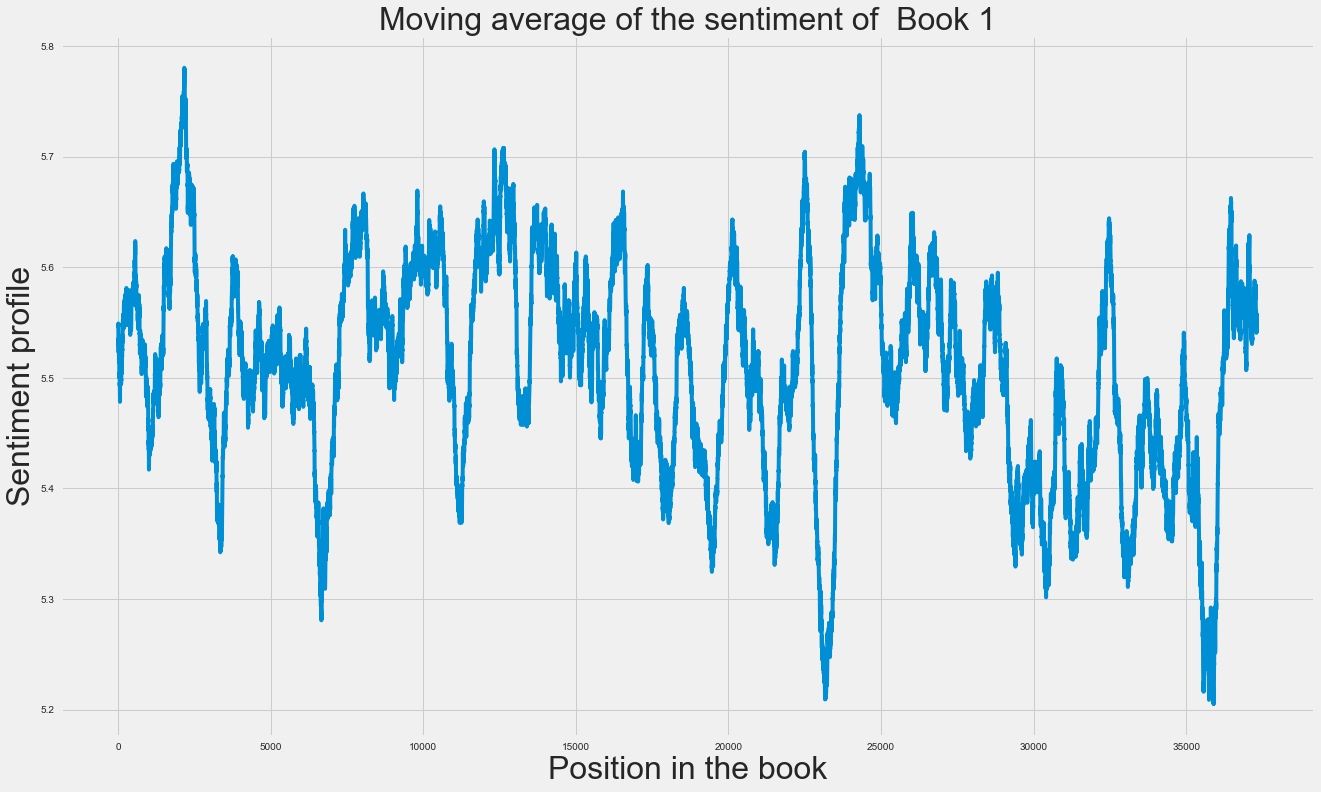

In [11]:
text=book1
ws=500
i=1
[x,y]=sentiment_profile(text,data_happiness,ws)
#Plotting changing the windows of words
fig = plt.figure(figsize=(20, 12))
plt.plot(x, y)
plt.title('Moving average of the sentiment of  Book %s' %i, fontsize=32,)
plt.xlabel('Position in the book', fontsize=32)
plt.ylabel('Sentiment profile', fontsize=32)
plt.savefig("Book1.png")
plt.show()



In [12]:
pos=np.argmin(y)
print "The darkest moment is for x = %s with a average sentiment of %s"%(x[pos],min(y))


The darkest moment is for x = 35893 with a average sentiment of 5.20513784461


In [13]:
s=""
for n in book1[pos:pos+ws]:
    s+=n+" "
print s

door voldemort screamed seize next second harry felt quirrell hand close wrist needle sharp pain seared across harry scar head felt though split yelled struggling might surprise quirrell pain head lessened looked around wildly quirrell gone hunched pain looking fingers blistering eyes seize seize shrieked voldemort quirrell lunged knocking harry clean feet landing hands around harry neck harry scar almost blinding pain could quirrell howling agony master cannot hold hands hands quirrell though pinning harry ground knees neck stared bewildered palms harry could looked burned shiny harry potter philosophers stone rowling kill fool done screeched voldemort quirrell raised hand perform deadly curse harry instinct reached grabbed quirrell face aaaargh quirrell rolled face blistering harry knew quirrell touch bare skin without suffering terrible pain chance keep hold quirrell keep enough pain stop curse harry jumped feet caught quirrell hung tight could quirrell screamed tried throw harry pa

**The senttiment of Book2**

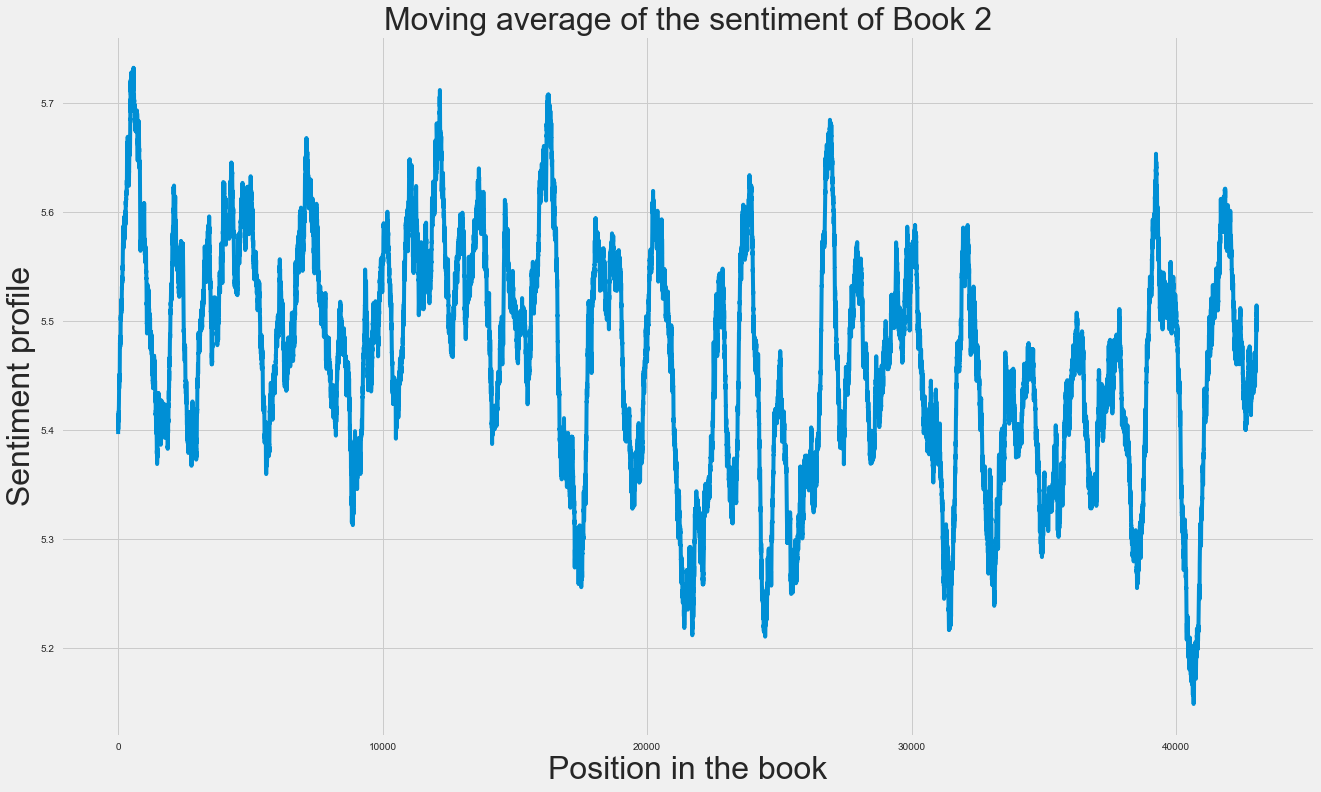

In [14]:
text=book2
ws=500
i=2
[x,y]=sentiment_profile(text,data_happiness,ws)
#Plotting changing the windows of words
fig = plt.figure(figsize=(20, 12))
plt.plot(x, y)
plt.title('Moving average of the sentiment of Book %s' %i, fontsize=32,)
plt.xlabel('Position in the book', fontsize=32)
plt.ylabel('Sentiment profile', fontsize=32)
plt.savefig("Book2.png")
plt.show()


In [15]:
pos=np.argmin(y)
print "The darkest moment is for x = %s with a average sentiment of %s"%(x[pos],min(y))

The darkest moment is for x = 40664 with a average sentiment of 5.14894878706


In [16]:
s=""
for n in book2[pos:pos+ws]:
    s+=n+" "
print s

snake spitting agony harry heard riddle screaming leave bird leave bird behind still smell kill blinded serpent swayed confused still deadly fawkes circling head piping eerie song jabbing scaly nose blood poured ruined eyes help help harry muttered wildly someone anyone snake tail whipped across floor harry ducked something soft face basilisk swept sorting harry arms harry seized left chance rammed onto head threw flat onto floor basilisk tail swung harry potter chamber secrets rowling help help harry thought eyes screwed tight please help answering voice instead contracted though invisible hand squeezing tightly something hard heavy thudded onto harry head almost knocking stars winking front eyes grabbed pull felt something long hard beneath gleaming silver sword appeared inside handle glittering rubies size eggs kill leave bird behind sniff smell harry feet ready basilisk head falling body coiling around hitting pillars twisted face could vast bloody sockets mouth stretching wide wid

**The senttiment of Book3**

In [17]:
text=book3
ws=500
i=3
[x,y]=sentiment_profile(text,data_happiness,ws)
#Plotting changing the windows of words
fig = plt.figure(figsize=(20, 12))
plt.plot(x, y)
plt.title('Moving average of the sentiment of Book %s'%i, fontsize=32,)
plt.xlabel('Position in the book', fontsize=32)
plt.ylabel('Sentiment profile', fontsize=32)
plt.savefig("Book3.png")
plt.show()


KeyboardInterrupt: 

In [ ]:
pos=np.argmax(y)
print "The happiest moment is for x = %s with a average sentiment of %s"%(x[pos],max(y))

In [ ]:
s=""
for n in book3[pos:pos+ws]:
    s+=n+" "
print s

**The senttiment of Book4**

In [ ]:
text=book4
ws=500
i=4
[x,y]=sentiment_profile(text,data_happiness,ws)
#Plotting changing the windows of words
fig = plt.figure(figsize=(20, 12))
plt.plot(x, y)
plt.title('Moving average of the sentiment of Book %s'%i, fontsize=32,)
plt.xlabel('Position in the book', fontsize=32)
plt.ylabel('Sentiment profile', fontsize=32)
plt.savefig("Book4.png")
plt.show()


In [ ]:
pos=np.argmax(y)
print "The happiest moment is for x = %s with a average sentiment of %s"%(x[pos],max(y))

In [ ]:
s=""
for n in book4[pos:pos+ws]:
    s+=n+" "
print s

**The senttiment of Book5**


In [ ]:
text=book5
ws=500
i=5
[x,y]=sentiment_profile(text,data_happiness,ws)
#Plotting changing the windows of words
fig = plt.figure(figsize=(20, 12))
plt.plot(x, y)
plt.title('Moving average of the sentiment of Book %s'%i, fontsize=32,)
plt.xlabel('Position in the book', fontsize=32)
plt.ylabel('Sentiment profile', fontsize=32)
plt.savefig("Book5.png")
plt.show()

In [ ]:
pos=np.argmin(y)
print "The darkest moment is for x = %s with a average sentiment of %s"%(x[pos],min(y))

In [ ]:
s=""
for n in book5[pos:pos+ws]:
    s+=n+" "
print s

**The senttiment of Book6**

In [ ]:
text=book6
ws=500
i=6
[x,y]=sentiment_profile(text,data_happiness,ws)
#Plotting changing the windows of words
fig = plt.figure(figsize=(20, 12))
plt.plot(x, y)
plt.title('Moving average of the sentiment of Book %s'%i, fontsize=32,)
plt.xlabel('Position in the book', fontsize=32)
plt.ylabel('Sentiment profile', fontsize=32)
plt.savefig("Book6.png")
plt.show()


In [ ]:
pos=np.argmin(y)
print "The darkest moment is for x = %s with a average sentiment of %s"%(x[pos],min(y))

In [ ]:
s=""
for n in book6[pos:pos+ws]:
    s+=n+" "
print s

**The senttiment of Book7**

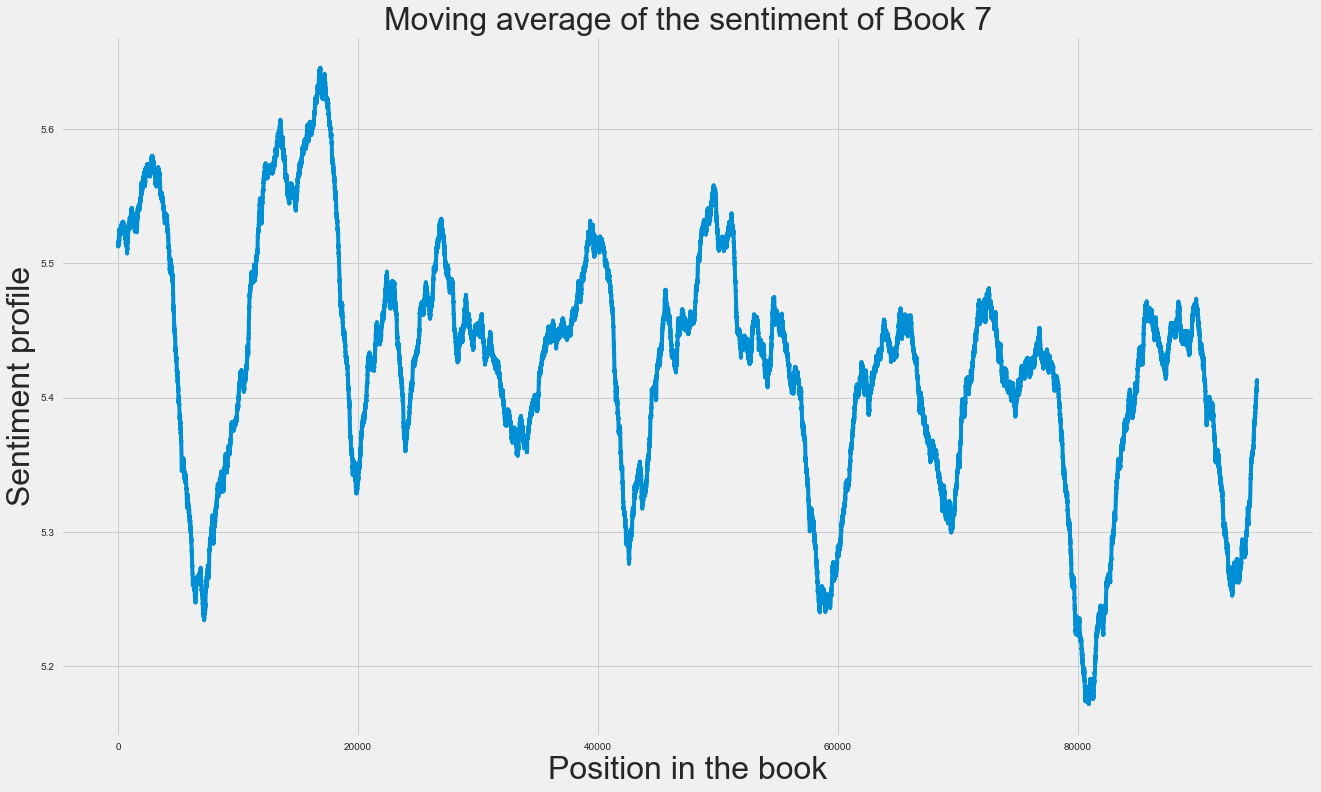

In [18]:
text=book7
ws=3000
i=7
[x,y]=sentiment_profile(text,data_happiness,ws)
#Plotting changing the windows of words
fig = plt.figure(figsize=(20, 12))
plt.plot(x, y)
plt.title('Moving average of the sentiment of Book %s'%i, fontsize=32,)
plt.xlabel('Position in the book', fontsize=32)
plt.ylabel('Sentiment profile', fontsize=32)
plt.savefig("Book7.png")
plt.show()


In [19]:
pos=np.argmin(y)
print "The darkest moment is for x = %s with a average sentiment of %s"%(x[pos],min(y))

The darkest moment is for x = 80949 with a average sentiment of 5.17208023774


In [20]:
s=""
for n in book6[pos:pos+ws]:
    s+=n+" "
print s

mcgonagall defense dark arts teacher assumed hurry chase death eaters escaped tower said harry savagely help stop dark mark barrier happened came back harry potter half blood prince rowling well death eater fired caused half ceiling fall also broke curse blocking stairs said lupin forward still standing anyway snape emerged dust obviously none attacked pass said tonks hollow voice thought chased death eaters next thing death eaters greyback back fighting thought heard snape shout something know shouted said harry done meant fell silent fawkes lament still echoing dark grounds outside music reverberated upon unbidden unwelcome thoughts slunk harry mind taken dumbledore body foot tower would happen next would rest clenched fists tightly pockets could feel small cold lump fake horcrux knuckles right hand doors hospital wing burst open making jump weasley striding ward fleur behind beautiful face terrified molly arthur said professor mcgonagall jumping hurrying greet sorry bill whispered w

**MOVIES ANALYSIS**

We now take into consideration the subtitles of the 8 movies. We want to visualize the sentiment in the movies. We will use "TextBlob" because the subtitles are time-dependent data. Unlike other time series data, subtitles don’t have constant time intervals. We will need to change them to equal time intervals. 
TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
It's possibile to divide the method in to 4 steps.
* Divide total running time to constant time intervals
* Collect and combine all the text in each time interval
* Find the sentiment polarity of text in each time interval
* Visualize our analysis

The sentiment polarity is a measure of the negativity, the neutralness, or the positivity of the text. The textblob.sentiments module contains two sentiment analysis implementations, PatternAnalyzer (based on the pattern library) and NaiveBayesAnalyzer (an NLTK classifier trained on a movie reviews corpus).The default implementation PatternAnalyzer is used in the code below.

In [ ]:
# Helper Function to create equally divided time intervals
# start - Starting Time
# end - Ending Time
# delta - Interval Period
def create_intervals(start, end, delta):
    curr = start
    while curr <= end:
        curr = (datetime.combine(date.today(), curr) + delta).time()
        yield curr

# Main Function to Get Sentiment Data
# file - srt file location
# delta - time interval in minutes
def get_sentiment(file, delta=2):
    # Reading Subtitle
    subs = pysrt.open(file, encoding='iso-8859-1')
    n = len(subs)
    # List to store the time periods
    intervals = []
    # Start, End and Delta
    start = time(0, 0, 0)
    end = subs[-1].end.to_time()
    delta = timedelta(minutes=delta)
    for result in create_intervals(start, end, delta):
        intervals.append(result)
    # List to store sentiment polarity
    sentiments = []
    
    index = 0
    m = len(intervals)
    # Collect and combine all the text in each time interval
    for i in range(m):
        text = ""
        for j in range(index, n):
            # Finding all subtitle text in the each time interval
            if subs[j].end.to_time() < intervals[i]:
                text += subs[j].text_without_tags + " "
            else:
                break
        # Sentiment Analysis
        blob = TextBlob(text)
        pol = blob.sentiment.polarity
        sentiments.append(pol)
        #blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
        #sent = blob.sentiment.
        #sentiments.append(sent)
        index = j
    # Adding Initial State
    intervals.insert(0, time(0, 0, 0))
    sentiments.insert(0, 0.0)
    return (intervals, sentiments)

# Utility to find average sentiment
def average(y):
    avg = float(sum(y))/len(y)
    return avg

We have written our function to find the sentiment of subtitle over an interval of time. Now let’s plot all the sentiment profile. The happiest and saddest moment will be double check with the subtitles and then we will find the scene in the movie. The timing of the subtitles could be a bit different respect to the movie, but we went through the exact subtitle speech in order to find the correct scene.

In [ ]:
x, y = get_sentiment("harry-potter-and-the-sorcerers-stone-1.srt")
fig, ax = plt.subplots()
plt.plot(x, y)
plt.title("Movie1", fontsize=32)
plt.ylim((-1, 1))
plt.ylabel("Sentiment Polarity")
plt.xlabel("Running Time")
plt.text(.5, 1.03, "Average Sentiment - " + str(round(average(y), 4)), color="green")
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.savefig("Movie1.png")
pos=np.argmax(y)
print "The happiest moment is at time %s with a average sentiment of %s"%(x[pos],max(y))

In [ ]:
x, y = get_sentiment("harry-potter-and-the-chamber-of-secrets-2.srt")
fig, ax = plt.subplots()
plt.plot(x, y)
plt.title("Movie2", fontsize=32)
plt.ylim((-1, 1))
plt.ylabel("Sentiment Polarity")
plt.xlabel("Running Time")
plt.text(.5, 1.03, "Average Sentiment - " + str(round(average(y), 4)), color="green")
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.savefig("Movie2.png")

In [ ]:
x, y = get_sentiment("harry-potter-and-the-prisoner-of-azkaban-3.srt")
fig, ax = plt.subplots()
plt.plot(x, y)
plt.title("Movie3", fontsize=32)
plt.ylim((-1, 1))
plt.ylabel("Sentiment Polarity")
plt.xlabel("Running Time")
plt.text(.5, 1.03, "Average Sentiment - " + str(round(average(y), 4)), color="green")
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.savefig("Movie3.png")
pos=np.argmin(y)
print "The saddest moment is at time %s with a average sentiment of %s"%(x[pos],min(y))

In [ ]:
x, y = get_sentiment("harry-potter-and-the-goblet-of-fire-4.srt")
fig, ax = plt.subplots()
plt.plot(x, y)
plt.title("Movie4", fontsize=32)
plt.ylim((-1, 1))
plt.ylabel("Sentiment Polarity")
plt.xlabel("Running Time")
plt.text(.5, 1.03, "Average Sentiment - " + str(round(average(y), 4)), color="green")
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.savefig("Movie4.png")
pos=np.argmin(y)
print "The saddest moment is at time %s with a average sentiment of %s"%(x[pos],min(y))

In [ ]:
x, y = get_sentiment("harry-potter-and-the-order-of-the-phoenix-5.srt")
fig, ax = plt.subplots()
plt.plot(x, y)
plt.title("Movie5", fontsize=32)
plt.ylim((-1, 1))
plt.ylabel("Sentiment Polarity")
plt.xlabel("Running Time")
plt.text(.5, 1.03, "Average Sentiment - " + str(round(average(y), 4)), color="green")
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.savefig("Movie5.png")


In [ ]:
x, y = get_sentiment("harry-potter-and-the-half-blood-prince-6.srt")
fig, ax = plt.subplots()
plt.plot(x, y)
plt.title("Movie6", fontsize=32)
plt.ylim((-1, 1))
plt.ylabel("Sentiment Polarity")
plt.xlabel("Running Time")
plt.text(.5, 1.03, "Average Sentiment - " + str(round(average(y), 4)), color="green")
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.savefig("Movie6.png")


In [ ]:
x, y = get_sentiment("harry-potter-and-the-deathly-hallows-part-1-7.srt")
fig, ax = plt.subplots()
plt.plot(x, y)
plt.title("Movie7", fontsize=32)
plt.ylim((-1, 1))
plt.ylabel("Sentiment Polarity")
plt.xlabel("Running Time")
plt.text(.5, 1.03, "Average Sentiment - " + str(round(average(y), 4)), color="green")
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.savefig("Movie7.png")

In [ ]:
x, y = get_sentiment("harry-potter-and-the-deathly-hallows-part-2-8.srt")
fig, ax = plt.subplots()
plt.plot(x, y)
plt.title("Movie8", fontsize=32)
plt.ylim((-1, 1))
plt.ylabel("Sentiment Polarity")
plt.xlabel("Running Time")
plt.text(.5, 1.03, "Average Sentiment - " + str(round(average(y), 4)), color="green")
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.savefig("Movie8.png")
pos1=np.argmin(y)
pos2=np.argmax(y)
print "The saddest moment is at time %s with a average sentiment of %s"%(x[pos1],min(y))
print "The happiest moment is at time %s with a average sentiment of %s"%(x[pos2],max(y))

All the analysis of the graphs are in the webpage.